In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#graphicnovel condition
pretest_graphicnovel = pd.read_excel("mainData/pretest_graphicnovel_40.xlsx")
postest_graphicnovel = pd.read_excel("mainData/postest_graphicnovel_40.xlsx")

#textonly condition
pretest_textonly = pd.read_excel("mainData/pretest_textonly_40.xlsx")
postest_textonly = pd.read_excel("mainData/postest_textonly_40.xlsx")

In [3]:
def pretest_cleanup(df):
    df.columns.values[6] = 'prolific_ID'
    # Set 'prolific_ID' column as the index
    df.set_index('prolific_ID', inplace=True)
    #remove NaN columns (feedback and points)
    df = df.dropna(axis=1, how='all')
    return df

def postest_cleanup(df):
    df.columns.values[7] = 'prolific_ID'
    # Set 'prolific_ID' column as the index
    df.set_index('prolific_ID', inplace=True)
    #remove NaN columns (feedback and points)
    df = df.dropna(axis=1, how='all')
    return df

#set prolific id as index + delete feedback and points
pretest_graphicnovel = pretest_cleanup(pretest_graphicnovel)
pretest_textonly = pretest_cleanup(pretest_textonly)

postest_graphicnovel = postest_cleanup(postest_graphicnovel)
postest_textonly = postest_cleanup(postest_textonly)

In [4]:

def checkTime(df, df2 = None):
    if df2 is None:
        # Calculate total time as timedelta
        df['Total time'] = df['Completion time'] - df['Start time']
        return df
    else:
        merged_time = pd.DataFrame()
        merged_time['Total time'] =  df2['Start time'] - df['Completion time']
        return  merged_time
  
    

def plot_completion_times(df):
    # Convert Total time to minutes
    df['Total time (minutes)'] = df['Total time'].dt.total_seconds() / 60
    mean_time = df['Total time (minutes)'].mean()
    std_dev = df['Total time (minutes)'].std()
    # Define a function to format the y-axis labels
    def time_ticks(x, pos):
        minutes = int(x)
        hours = minutes // 60
        minutes = minutes % 60
        return f'{hours:02d}:{minutes:02d}'

    fig, ax = plt.subplots(figsize=(4, 4))
    df['Total time (minutes)'].plot(kind='bar', ax=ax)
    
    # Set y-axis label formatter
    ax.yaxis.set_major_formatter(FuncFormatter(time_ticks))
    
    # Remove x-axis labels
    ax.set_xticklabels([])
     # Add mean and standard deviation text to the plot
    ax.text(0.7, 0.95, f'Mean: {mean_time:.2f} minutes\nStd Dev: {std_dev:.2f} minutes',  fontsize=7, 
            horizontalalignment='center', verticalalignment='top', transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.5))
    plt.ylabel('Completion Time (HH:MM)')
    plt.xlabel('Prolific Participants')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


PRETEST TIME

In [5]:
#compute time for pretest (both coonditions)
pretest_gn = checkTime(pretest_graphicnovel)
pretest_to = checkTime(pretest_textonly)


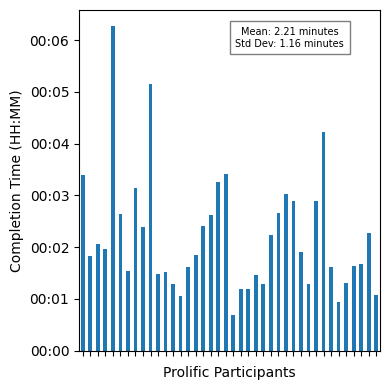

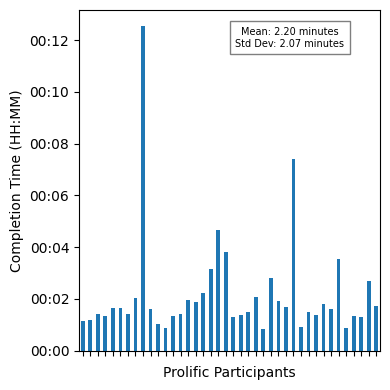

In [6]:

plot_completion_times(pretest_gn)
plot_completion_times(pretest_to)

POSTEST TIME

In [7]:
#compute time for postest (both conditions)
postest_gn = checkTime(postest_graphicnovel)
postest_to = checkTime(postest_textonly)


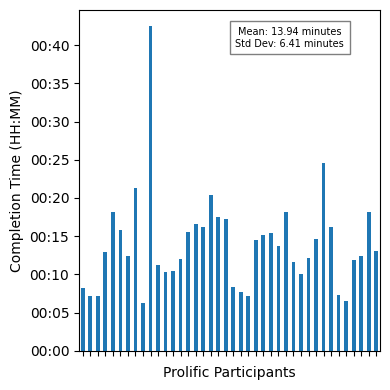

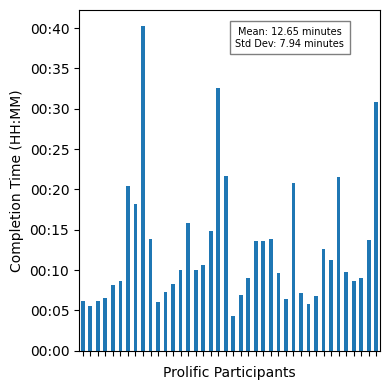

In [8]:

plot_completion_times(postest_gn)
plot_completion_times(postest_to)

READING TIME (time in between pre and post test)

In [9]:
#compute reading time (both conditions)
reading_gn = checkTime(pretest_graphicnovel, postest_graphicnovel)
reading_to = checkTime(pretest_textonly, postest_textonly)

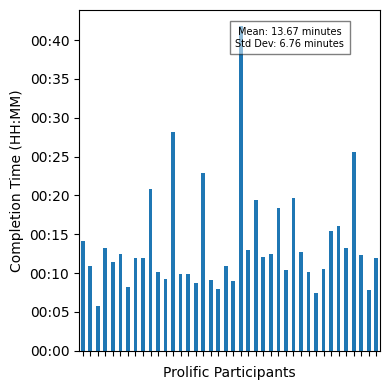

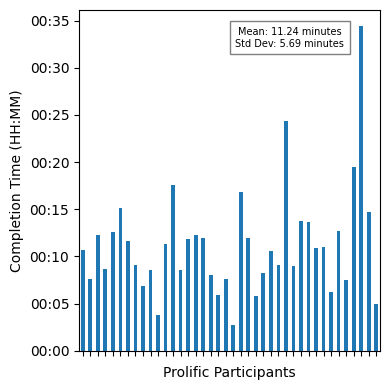

In [10]:

plot_completion_times(reading_gn)
plot_completion_times(reading_to)

In [11]:
names = ["Pre-test time","Reading time", "Post-test time"]

time_gn = pd.concat([pretest_gn['Total time'], reading_gn['Total time'], postest_gn['Total time']], axis=1)
time_gn.columns = ["Pre-test time","Reading time", "Post-test time"]


time_to = pd.concat([pretest_to['Total time'], reading_to['Total time'], postest_to['Total time']], axis=1)
time_to.columns = ["Pre-test time","Reading time", "Post-test time"]

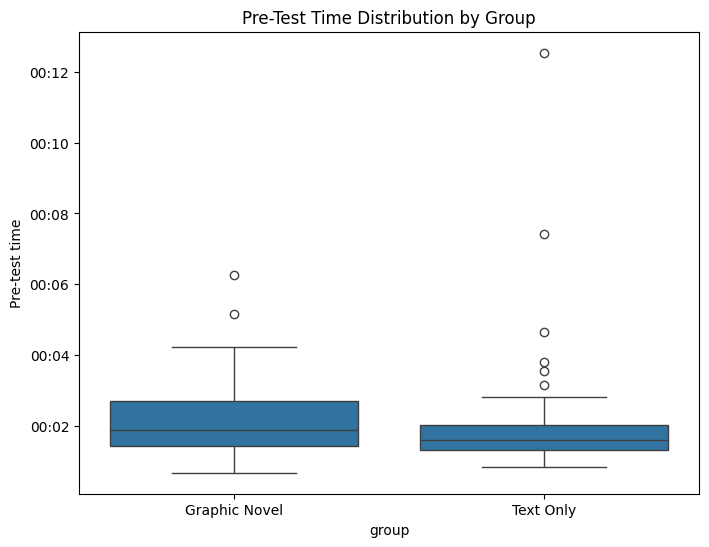

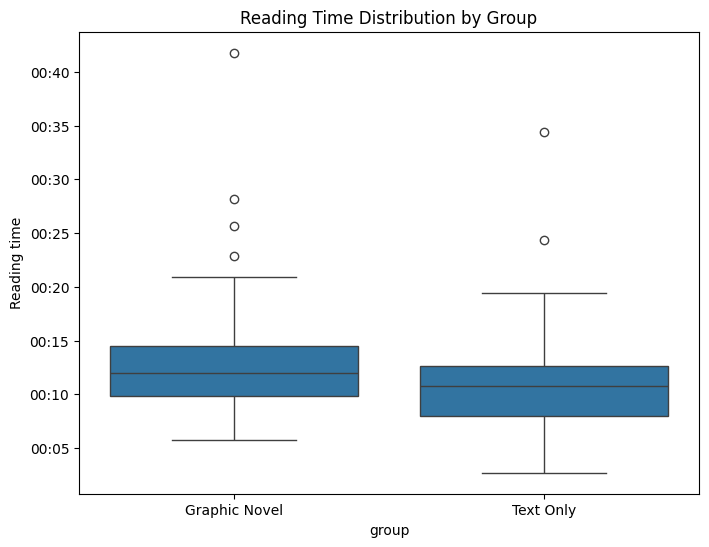

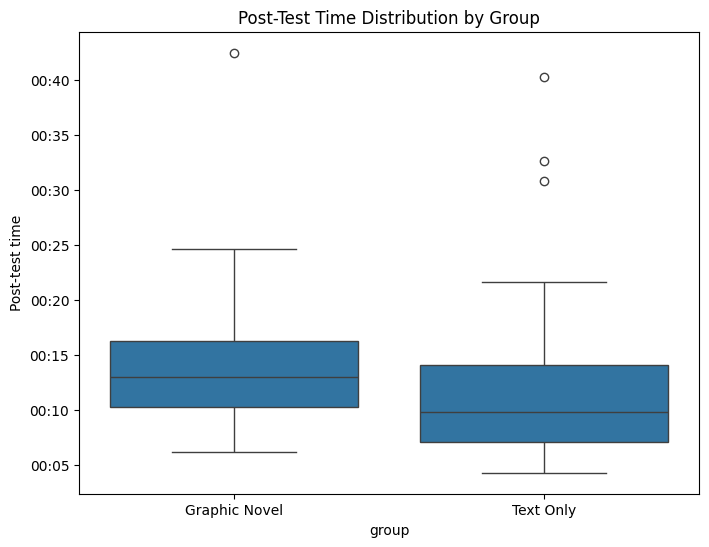

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Assuming time_gn and time_to are defined DataFrames
# Add 'group' column to each DataFrame
time_gn['group'] = 'Graphic Novel'
time_to['group'] = 'Text Only'

# Convert Total time to minutes
for col in time_gn.columns[:-1]:
        time_gn[col] = time_gn[col].dt.total_seconds() / 60
        time_to[col] = time_to[col].dt.total_seconds() / 60

# Concatenate the DataFrames
df_combined = pd.concat([time_gn, time_to])

# Define the order of groups for plotting
group_order = ['Graphic Novel', 'Text Only']

# List of columns to plot
columns_to_plot = df_combined.columns[:-1] 

# Define a function to format time values
def time_ticks(x, pos):
        minutes = int(x)
        hours = minutes // 60
        minutes = minutes % 60
        return f'{hours:02d}:{minutes:02d}'

# Loop through the columns and create box plots
for column in columns_to_plot:
    # Sort the DataFrame by the column you are plotting in descending order
    sorted_df = df_combined.sort_values(by=column, ascending=False)
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='group', y=column, data=sorted_df, order=group_order)
    plt.title(f'{column.replace("_", " ").title()} Distribution by Group')
    
    # Format time values on the y-axis to show only minutes and seconds
    plt.gca().yaxis.set_major_formatter(FuncFormatter(time_ticks))
    
    # Adjust x-axis tick labels to ensure consistency
    plt.xticks(ticks=[0, 1], labels=group_order)
    
    plt.savefig(f"plots/time/{column}.png")
    plt.show()


In [13]:
time_gn['Pre-test time']

prolific_ID
5c55c7cb9b583c000159f790    3.400000
5c35d8eb7cca44000102ad54    1.833333
61574002e457b8c50f26f997    2.066667
600313fd4a113e381296a3db    1.966667
609e4a1bee567106a668ca8e    6.266667
6047238e77116b1a263b6dfd    2.633333
5ed14691e983f5067842fd20    1.533333
5ece75528f582a08555e0a3e    3.150000
5d70384bc4f383000128da9c    2.383333
5e87a6ee14560f0d57e1f984    5.150000
58e0d6aaf0ec8a000120b50c    1.483333
5ea6df209d688606829ac644    1.516667
5f7f5e8b8a10ca0f5fffd9f9    1.283333
5d16539382c22b00155d9254    1.050000
6079c61f10456640488d45b9    1.616667
5de2b59d8fde1c2eb47f92d8    1.850000
5e8f740429529124dfc3e7a5    2.400000
5f8893a5e2f88a04b1833278    2.616667
612292fb4925ef04600c234e    3.250000
5fb2d087a956be967181e2d1    3.416667
5974ce5364b35a00019dd811    0.683333
5fdf808af53c7a7e9199b430    1.200000
5db35c6cd14d3d000a07f3f6    1.183333
5e822b16f4c3fb9446c4ac8e    1.466667
5e62bf1518b42b05d6950408    1.283333
5dbc09abbc03131b83aeeacd    2.233333
6103a3ece71ab061d5624402  

In [14]:
time_gn['Pre-test time'] = time_gn['Pre-test time'].astype(str)
time_gn['Reading time'] = time_gn['Reading time'].astype(str)
time_gn['Post-test time'] = time_gn['Post-test time'].astype(str)

time_to['Pre-test time'] = time_to['Pre-test time'].astype(str)
time_to['Reading time'] = time_to['Reading time'].astype(str)
time_to['Post-test time'] = time_to['Post-test time'].astype(str)

In [15]:
time_gn['Pre-test time']

prolific_ID
5c55c7cb9b583c000159f790                   3.4
5c35d8eb7cca44000102ad54    1.8333333333333333
61574002e457b8c50f26f997     2.066666666666667
600313fd4a113e381296a3db    1.9666666666666666
609e4a1bee567106a668ca8e     6.266666666666667
6047238e77116b1a263b6dfd    2.6333333333333333
5ed14691e983f5067842fd20    1.5333333333333334
5ece75528f582a08555e0a3e                  3.15
5d70384bc4f383000128da9c    2.3833333333333333
5e87a6ee14560f0d57e1f984                  5.15
58e0d6aaf0ec8a000120b50c    1.4833333333333334
5ea6df209d688606829ac644    1.5166666666666666
5f7f5e8b8a10ca0f5fffd9f9    1.2833333333333334
5d16539382c22b00155d9254                  1.05
6079c61f10456640488d45b9    1.6166666666666667
5de2b59d8fde1c2eb47f92d8                  1.85
5e8f740429529124dfc3e7a5                   2.4
5f8893a5e2f88a04b1833278    2.6166666666666667
612292fb4925ef04600c234e                  3.25
5fb2d087a956be967181e2d1    3.4166666666666665
5974ce5364b35a00019dd811    0.6833333333333333
5

In [16]:

# Save DataFrames to excel file
time_gn.to_excel('time_gn_40.xlsx', index=True)
# Save DataFrames to excel file
time_to.to_excel('time_to_40.xlsx', index=True)